# 30회 ADP 복원 

# 기계학습 (60점)

In [8]:
import pandas as pd

## 데이터 설명
- 데이터 출처 : 캐글어딘가.. 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv
- 데이터 설명 : 혈압 데이터 DBP

In [211]:
#encoding = ['utf-8','cp949','utf-8-sig','euc-kr','latin']
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv',encoding= 'cp949')
df.head()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.80,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.60,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.30,5.87,1.29,1.75,3.37,10.1,61.1,4.85
3,43,1,23.1,71,4.50,4.05,0.74,1.27,2.60,36.5,73.4,5.30
4,36,1,26.5,82,5.54,6.69,3.49,0.91,3.64,69.3,67.5,5.53


## 1-1  EDA를 시행하라 

In [212]:
'''
ChoI를 제외한 모든 자료에 결측치가 없음을 확인할 수 있고 수치형 변수임을 확인할 수 있다. 
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     4303 non-null   int64  
 1   Gender  4303 non-null   int64  
 2   BMI     4303 non-null   float64
 3   DBP     4303 non-null   int64  
 4   FPG     4303 non-null   float64
 5   Chol    4302 non-null   float64
 6   Tri     4303 non-null   float64
 7   HDL     4303 non-null   float64
 8   LDL     4303 non-null   float64
 9   ALT     4303 non-null   float64
 10  CCR     4303 non-null   float64
 11  FFPG    4303 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 403.5 KB


In [213]:
'''
Age의 최대값은 93, 최소값은 22이며 1,2,3분위 수를 알 수 있다. 해당 변수 외에 다른 변수들도 최대, 최소값을 알 수 있으며, 1,2,3분위 수를 알 수 있다.
다만 gender 변수는 현재 수치형 변수로 나타나 있으나 사실상 1과 2로 이루어진 명목형 변수임을 알 수 있다.
'''
df.describe()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4302.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,76.360446,5.226368,4.860732,1.588476,1.666765,2.976220,26.754810,71.557080,5.729084
std,14.686155,0.477530,3.397294,11.004056,0.781089,0.925484,1.260003,1.079377,0.892196,22.279922,16.937394,1.424568
min,22.000000,1.000000,15.600000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,4.860753,3.200000
25%,35.000000,1.000000,21.700000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,60.000000,4.900000
50%,46.000000,1.000000,24.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,72.000000,5.300000
75%,59.000000,2.000000,26.300000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,82.300000,6.020000
max,93.000000,2.000000,45.800000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,307.000000,29.700000


## 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라

In [214]:
# ChoI의 결측치를 평균값으로 채운다
df['Chol'].fillna(df['Chol'].mean(),inplace = True)

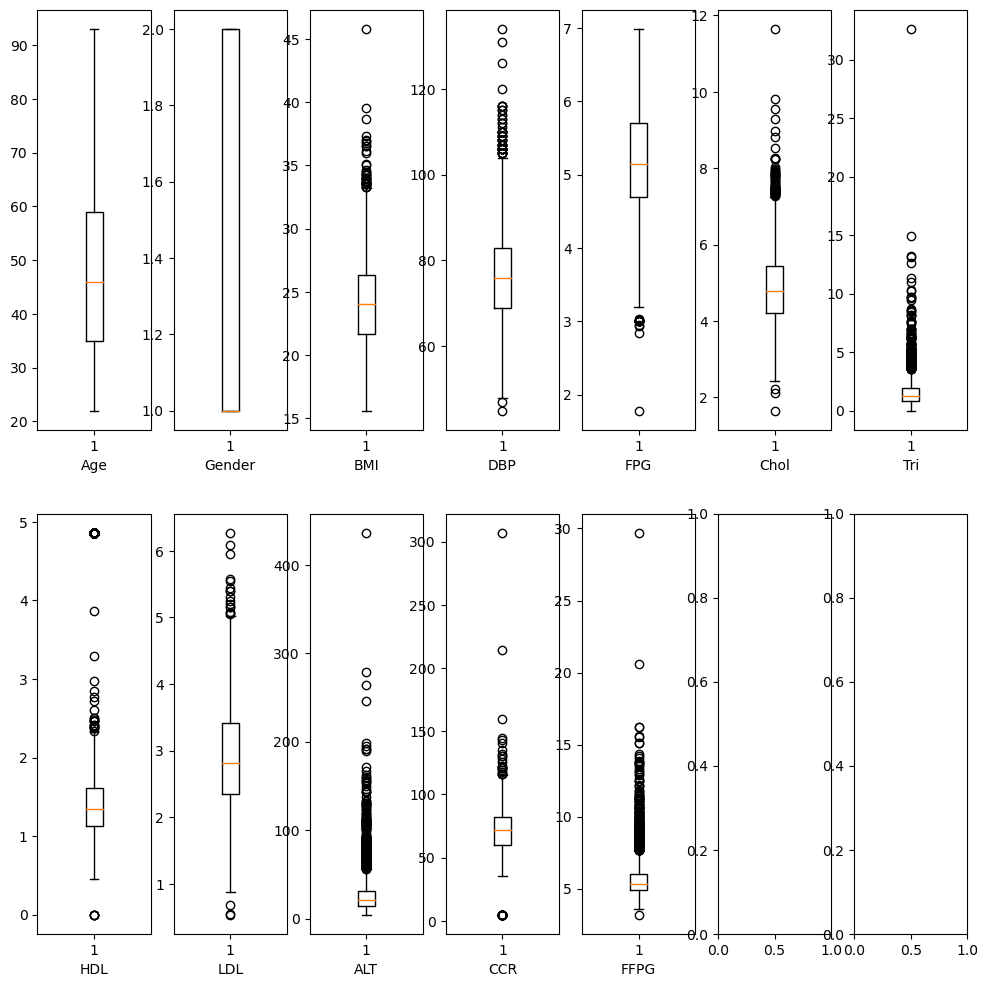

In [215]:
'''
일부 변수들(Tri,ALT,CCR,FFPG)에서 눈에 띄는 이상치가 발견되며, 해당 부분을 처리해야할 것으로 보인다.
'''
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 7, figsize = (12,12))
for ax, col in zip(axes.ravel(),df.columns):
    ax.boxplot(df[[col]])
    ax.set_xlabel(col)
plt.show()

In [216]:
# 이상치 처리
for column in ['Tri','ALT','CCR','FFPG']:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    top = df[column].quantile(0.75) + IQR * 1.5
    down = df[column].quantile(0.25) - IQR * 1.5
    df[column] = df.clip(down,top)[column]

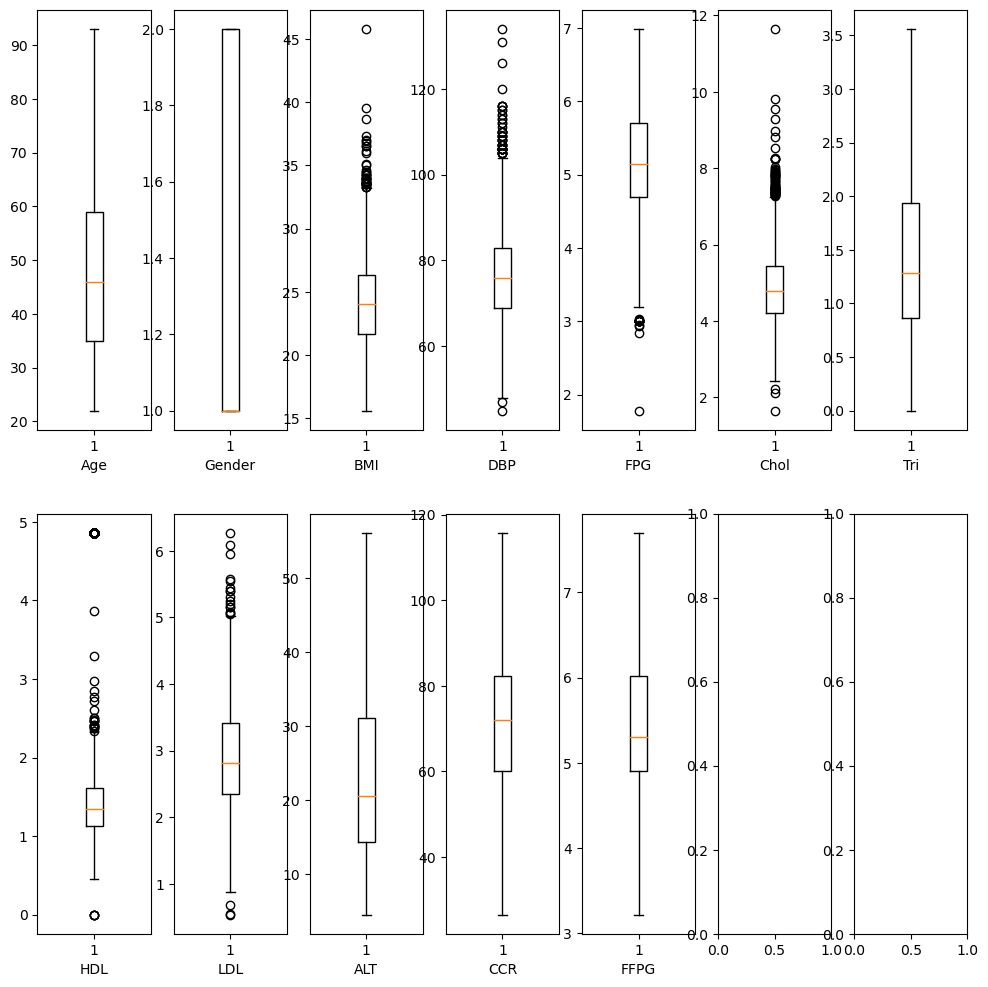

In [217]:
# 처리하고자 했던 'Tri','ALT','CCR','FFPG'의 이상치가 해결된 것을 확인할 수 있다.
fig, axes = plt.subplots(2, 7, figsize = (12,12))
for ax, col in zip(axes.ravel(),df.columns):
    ax.boxplot(df[[col]])
    ax.set_xlabel(col)
plt.show()

## 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

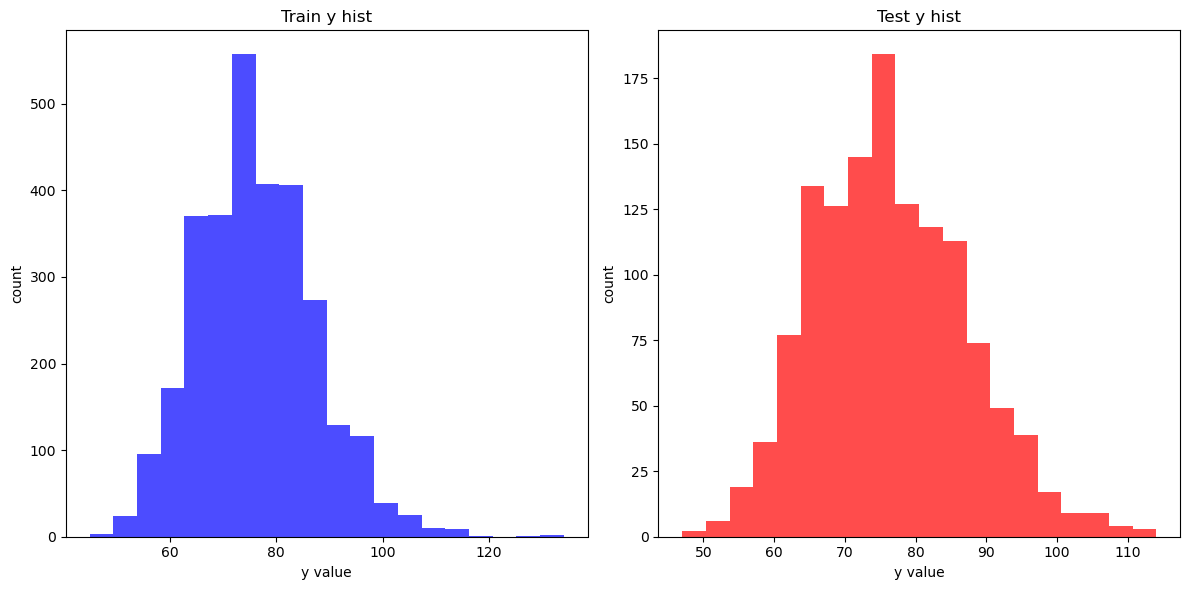

'\ntrain 데이터와 test 데이터의 y 분포가 유사하고,\n데이터가 골고루 분포함을 볼 수 있다.\n'

In [218]:

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# ---------------   폰트   ------------------
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
#-----------------------------------------------


X = df.drop(columns=['DBP'])
y = df['DBP']

# 데이터를 7:3 비율로 학습 및 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, color='blue', alpha=0.7)
plt.title('Train y hist')
plt.xlabel('y value')
plt.ylabel('count')

plt.subplot(1, 2, 2)
plt.hist(y_valid, bins=20, color='red', alpha=0.7)
plt.title('Test y hist')
plt.xlabel('y value')
plt.ylabel('count')

plt.tight_layout()
plt.show()

'''
train 데이터와 test 데이터의 y 분포가 유사하고,
데이터가 골고루 분포함을 볼 수 있다.
'''

## 2-1 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오

In [219]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif
'''
VIF가 10이 넘는 값을 하나씩 제거하는 차원 축소가 필요하다.
'''



,VIF Factor,features
0,16.355157,Age
1,11.955716,Gender
2,61.417097,BMI
3,69.680303,FPG
4,73.399473,Chol
5,5.872114,Tri
6,8.829714,HDL
7,53.428471,LDL
8,6.222395,ALT
9,24.773489,CCR


In [192]:
#Chol 제외
df1 = X.drop('Chol',axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif


,VIF Factor,features
0,5.608077,Tri
1,6.200188,ALT
2,6.381870,HDL
3,9.804750,Gender
4,16.308096,Age
5,22.992023,CCR
6,23.933808,LDL
7,61.167755,FFPG
8,61.293499,BMI
9,68.960861,FPG


In [193]:
#FPG 제외
df1= df1.drop('FPG',axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif


,VIF Factor,features
0,5.590926,Tri
1,6.200147,ALT
2,6.381076,HDL
3,9.294377,Gender
4,16.183397,Age
5,21.605685,CCR
6,23.880383,LDL
7,43.926691,FFPG
8,58.726575,BMI


In [194]:
#BMI제외

df1= df1.drop('BMI',axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif


,VIF Factor,features
0,5.417610,Tri
1,5.482969,ALT
2,6.339367,HDL
3,7.966986,Gender
4,15.840779,CCR
5,16.004700,Age
6,23.447853,LDL
7,39.167790,FFPG


In [195]:
#FFPG제외

df1= df1.drop('FFPG',axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif


,VIF Factor,features
0,5.225547,ALT
1,5.355978,Tri
2,6.204530,HDL
3,6.375769,Gender
4,11.906498,CCR
5,13.049587,Age
6,23.284813,LDL


In [196]:
#LDL제외

df1= df1.drop('LDL',axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif


,VIF Factor,features
0,3.527635,HDL
1,5.017200,ALT
2,5.185920,Tri
3,5.826931,Gender
4,10.796261,CCR
5,12.442844,Age


In [197]:
#Age제외

df1= df1.drop('Age',axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
print(vif)
df1_origin = df1.copy()


   VIF Factor features
0    3.295704      HDL
1    4.815187      Tri
2    4.878455   Gender
3    5.012072      ALT
4    8.242830      CCR


In [198]:
'''
VIF가 10이 넘는 Age,LDL,FFPG,BMI,FPG,Chol 총 6개의 컬럼을 제외하여야 다중공선성 문제가 사라짐을 확인할 수 있다
'''


'\nVIF가 10이 넘는 Age,LDL,FFPG,BMI,FPG,Chol 총 6개의 컬럼을 제외하여야 다중공선성 문제가 사라짐을 확인할 수 있다\n'

## 2-2 2-1 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명

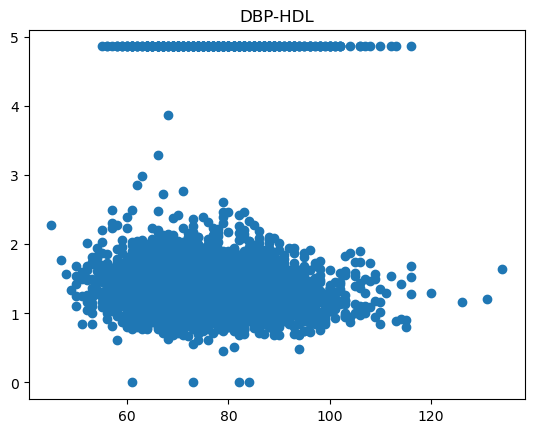

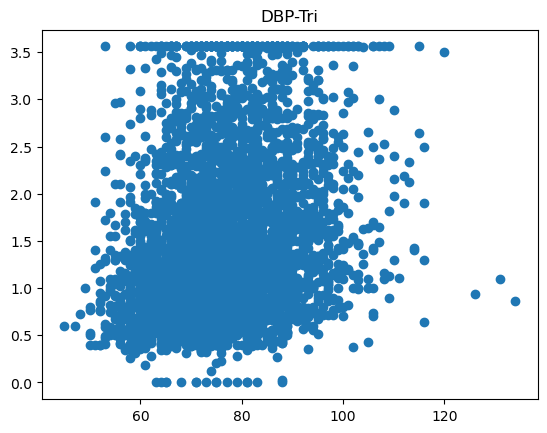

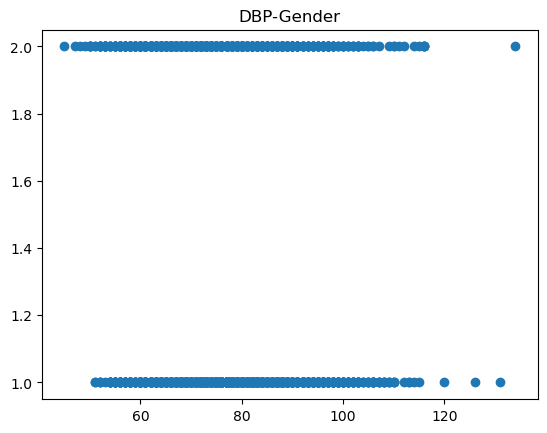

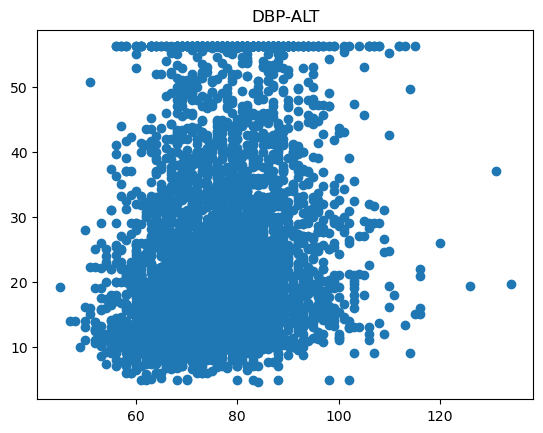

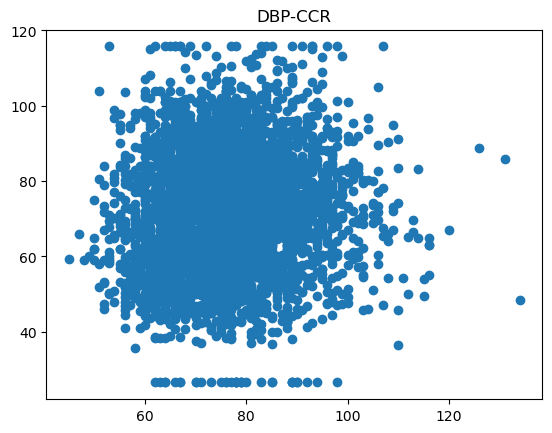

독립변수와 종속변수 사이에 약간의 선형성이 보인다


In [199]:
#선형성

import matplotlib.pyplot as plt
plt.title('DBP-HDL')
plt.scatter(df['DBP'],df['HDL'])
plt.show()

plt.title('DBP-Tri')
plt.scatter(df['DBP'],df['Tri'])
plt.show()

plt.title('DBP-Gender')
plt.scatter(df['DBP'],df['Gender'])
plt.show()

plt.title('DBP-ALT')
plt.scatter(df['DBP'],df['ALT'])
plt.show()

plt.title('DBP-CCR')
plt.scatter(df['DBP'],df['CCR'])
plt.show()
print('독립변수와 종속변수 사이에 약간의 선형성이 보인다')

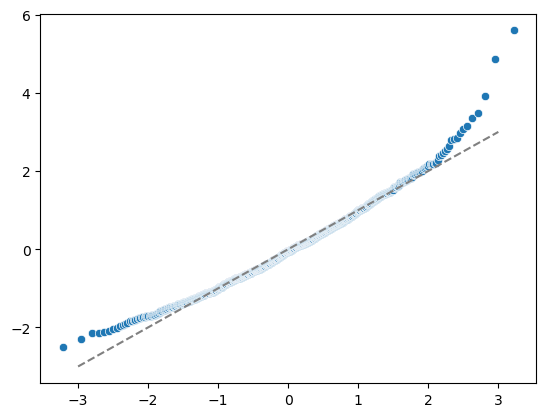

잔차가 정규성을 만족함


In [200]:
#잔차의 정규성
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df1, y)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
resid = y_test - y_pred

import scipy.stats
sr = scipy.stats.zscore(resid)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()
print('잔차가 정규성을 만족함')


In [201]:
# 잔차의 독립성

from statsmodels.stats.stattools import durbin_watson
res = durbin_watson(resid)
print('0~2 값은 양의 자기 상관관계를 나타내며 2~4 값은 음의 자기 상관관계. 2에 가까울수록 독립성이 강함')
print('결과값:',res)
print('잔차가 독립성을 만족함을 알 수 있음')

0~2 값은 양의 자기 상관관계를 나타내며 2~4 값은 음의 자기 상관관계. 2에 가까울수록 독립성이 강함
결과값: 2.0125608207925985
잔차가 독립성을 만족함을 알 수 있음


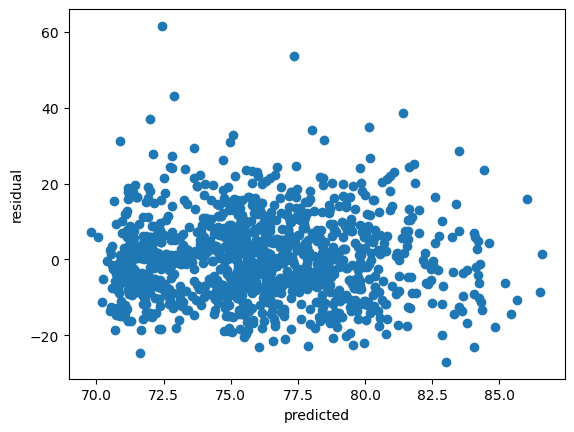

잔차가 고른것을 확인할 수 있으며 등분산성을 만족함


In [206]:
#잔차의 등분산성
plt.scatter(x=y_pred, y = resid)
#plt.ylim(-1,1)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()
print('잔차가 고른것을 확인할 수 있으며 등분산성을 만족함')

## 3-1 회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점 비교

In [52]:
'''
1. 릿지, 2. 라쏘, 3. 엘라스틱넷을 선택하였다. 과적합 방지에 좋은 3가지 모델을 선택하게 되었다.
릿지
- 장점 : 과적합(Overfitting)을 방지하는 데 효과적이고, 큰 계수(coefficient) 값을 줄여서 모델을 더 안정적으로 만든다.
- 단점 : 계수를 0으로 축소하지 않으므로 변수 선택을 수행하지 않는다.

라쏘
- 장점 : 불필요한 변수의 계수를 0으로 축소하여 모델을 간단하게 만든다. 다중공선성 문제 해결에 좋다.
- 단점 : 변수 선택을 수행하는 동안 계수를 완전히 0으로 만들 수 있으므로 일부 변수를 제외하고 모델이 작동하는 경우가 발생할 수 있다.(희소성의 문제)

엘라스틱 넷
- 장점 : 릿지와 라쏘의 장점을 혼합하여 변수 선택과 과적합 방지 모두 고려한다.
- 단점 : 라쏘와 마찬가지로 희소한 모델을 생성할 수 있으므로 모든 변수가 중요하지 않은 경우에는 성능이 저하될 수 있다.
'''



'\n1. 릿지, 2. 라쏘, 3. 엘라스틱넷을 선택하였다. 과적합 방지에 좋은 3가지 모델을 선택하게 되었다.\n릿지\n- 장점 : 과적합(Overfitting)을 방지하는 데 효과적이고, 큰 계수(coefficient) 값을 줄여서 모델을 더 안정적으로 만든다.\n- 단점 : 계수를 0으로 축소하지 않으므로 변수 선택을 수행하지 않는다.\n\n라쏘\n- 장점 : 불필요한 변수의 계수를 0으로 축소하여 모델을 간단하게 만든다. 다중공선성 문제 해결에 좋다.\n- 단점 : 변수 선택을 수행하는 동안 계수를 완전히 0으로 만들 수 있으므로 일부 변수를 제외하고 모델이 작동하는 경우가 발생할 수 있다.(희소성의 문제)\n\n엘라스틱 넷\n- 장점 : 릿지와 라쏘의 장점을 혼합하여 변수 선택과 과적합 방지 모두 고려한다.\n- 단점 : 라쏘와 마찬가지로 희소한 모델을 생성할 수 있으므로 모든 변수가 중요하지 않은 경우에는 성능이 저하될 수 있다.\n'

## 3-2. 1-3에서 구분한 데이터를 기준으로 3개의 회귀 분석 모델링을 진행하고 평가지표 rmse로 가장 최적화된 알고리즘 선정

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np

#릿지
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 생성 (alpha 매개변수는 규제 강도를 조절)
alpha = 1.0 
ridge_model = Ridge(alpha=alpha)

# 모델을 학습 데이터에 맞춤
ridge_model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 생성
y_pred = ridge_model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"릿지 모델의 RMSE: {rmse:.4f}")

#라쏘
# 릿지 회귀 모델 생성 (alpha 매개변수는 규제 강도를 조절)
alpha = 1.0 
Lasso_model = Lasso(alpha=alpha)

# 모델을 학습 데이터에 맞춥니다
Lasso_model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 생성합니다
y_pred = Lasso_model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"라쏘 모델의 RMSE: {rmse:.4f}")

# 엘라스틱 넷
alpha = 1.0  
l1_ratio = 0.5
Ela_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)


Ela_model.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 생성
y_pred = Ela_model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"엘라스틱 모델의 RMSE: {rmse:.4f}")
print('릿지 성능이 가장 좋으므로 릿지를 선택')

릿지 모델의 RMSE: 10.1777
라쏘 모델의 RMSE: 10.2787
엘라스틱 모델의 RMSE: 10.2692
릿지 성능이 가장 좋으므로 릿지를 선택


## 3-3 3-2에서 가장 성능 좋은 알고리즘을 이용하여 K-Fold 교차검증을 수행하시오.

In [228]:
X.shape

(4303, 5)

In [238]:
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold 교차 검증 설정
scores = cross_val_score(ridge_model, df1, y, cv=kfold, scoring='neg_mean_squared_error')
print(abs(scores.mean()))


110.35807908241411


## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv
- 데이터 설명 : 자전거사고 다발지역 개별사고 정보
1) 대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
2) 다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역

In [256]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv',encoding='cp949')
df.head()

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
0,경상,여,75세,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15시
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13시
2,중상,남,34세,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08시
3,경상,남,45세,자전거,경상,차대차 - 기타,맑음,0,2018-06-03 18시
4,중상,남,20세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-06-28 16시


## 4-1 발생시각을 통해 평일인지 주말인지를 구분하는  '주말여부'  범주형 변수 추가하고 데이터 분포를 확인하라. (월 ~ 금은 평일, 토요일과 일요일을 주말)

In [268]:

# 문자열을 datetime 형식으로 변환
data = pd.to_datetime(df['발생시각'], format='%Y-%m-%d %H시')

# 주말 여부를 나타내는 컬럼 생성
df['주말여부'] = data.dt.dayofweek // 5  # 0: 월요일(0)부터 4: 금요일(4)까지는 주중, 나머지는 주말



In [269]:
df['주말여부'].replace(0,'평일',inplace=True)
df['주말여부'].replace(1,'주말',inplace=True)

In [270]:
df['주말여부'].unique()

array(['평일', '주말'], dtype=object)

## 4-2 사고내용에 따라 각 독립변수들(가해자성별,가해자연령,가해자차종,사고유형,기상상태,주말여부 등)이 유의한지 통계적 검정하라.

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   사고내용       2410 non-null   object
 1   가해자성별      2400 non-null   object
 2   가해자연령      2406 non-null   object
 3   가해자차종      2410 non-null   object
 4   피해자신체상해정도  2410 non-null   object
 5   사고유형       2410 non-null   object
 6   기상상태       2410 non-null   object
 7   사망자수       2410 non-null   int64 
 8   발생시각       2410 non-null   object
 9   주말여부       2410 non-null   object
dtypes: int64(1), object(9)
memory usage: 188.4+ KB


In [274]:
import pandas as pd
from scipy.stats import chi2_contingency


cross_tab = pd.crosstab(df['가해자성별'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"가해자성별 p-값: {p}")

cross_tab = pd.crosstab(df['가해자연령'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"가해자연령 p-값: {p}")

cross_tab = pd.crosstab(df['가해자차종'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"가해자차종 p-값: {p}")

cross_tab = pd.crosstab(df['피해자신체상해정도'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"피해자신체상해정도 p-값: {p}")

cross_tab = pd.crosstab(df['사고유형'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"사고유형 p-값: {p}")

cross_tab = pd.crosstab(df['기상상태'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"기상상태 p-값: {p}")

cross_tab = pd.crosstab(df['사망자수'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"사망자수 p-값: {p}")


cross_tab = pd.crosstab(df['발생시각'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"발생시각 p-값: {p}")

cross_tab = pd.crosstab(df['주말여부'], df['사고내용'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"주말여부 p-값: {p}")

print('피해자신체상해정도, 사고유형, 주말여부가 유의미한 변수로 선택됨을 알 수 있다.')

가해자성별 p-값: 0.5159368514762733
가해자연령 p-값: 0.7759512805534977
가해자차종 p-값: 0.6745843129110132
피해자신체상해정도 p-값: 0.0
사고유형 p-값: 0.011962092421477555
기상상태 p-값: 0.12670963472650218
사망자수 p-값: 0.5979373276003996
발생시각 p-값: 0.5714836193914324
주말여부 p-값: 0.03396483861780102
피해자신체상해정도, 사고유형, 주말여부가 유의미한 변수로 선택됨을 알 수 있다.


## 4-3 4-2 에서 유의한 변수들만 가지고 SMOTE 오버샘플링을 수행하고 범주형변수는 변수별 빈도를 나타내고 연속형이면 평균을 나타내시오

In [279]:


from sklearn.preprocessing import LabelEncoder

encoder = {}
list = ['피해자신체상해정도','사고유형','주말여부','사고내용']
for col in list:
  lbl = LabelEncoder()
  lbl.fit(df[col])
  encoder[col] = lbl
  df[col] = lbl.transform(df[col])

x = df[['피해자신체상해정도','사고유형','주말여부']]
y = df['사고내용']

from imblearn.over_sampling import SMOTE
X_sm, y_sm = SMOTE(random_state = 0).fit_resample(x,y)
y_sm.value_counts()

0    1428
1    1428
Name: 사고내용, dtype: int64

## 4-4 4-3 데이터를 가지고 사고내용을 종속변수로 하여 로지스틱회귀분석, XGB 분류 분류 모델을 만들고 성능 비교를 하고 영향력 있는 변수를 확인하라

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test = train_test_split(
    X_sm,y_sm,test_size = 0.3, random_state = 1, stratify= y_sm
)
print('xgboost 결과')
from xgboost import XGBClassifier
model1 = XGBClassifier(n_estimators = 500,
                       random_state =1,max_depth = 2, objective = 'binary:logistic').fit(X_train,y_train)
y_pred0 = model1.predict(X_test)
print(classification_report(y_pred0,y_test))


print('로지스틱회귀 결과')
from sklearn.linear_model import LogisticRegression  
  
model2 = LogisticRegression()  
model2.fit(X_train, y_train)
y_pred0 = model2.predict(X_test)
print(classification_report(y_pred0,y_test))

print('둘 다 비슷한 성능을 보임.')
# 시리즈로 만들어 인덱스를 붙인다


print('영향력 있는 변수\n\n')
ser = pd.Series(model1.feature_importances_, index=x.columns)

# 내림차순 정렬을 이용한다
top3 = ser.sort_values(ascending=False)[:3]
print(top3)

print('\n피해자 신체 상해정도, 사고유형,주말 여부 순으로 영향력있는 변수가 결정됨')

xgboost 결과
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       437
           1       0.98      1.00      0.99       420

    accuracy                           0.99       857
   macro avg       0.99      0.99      0.99       857
weighted avg       0.99      0.99      0.99       857

로지스틱회귀 결과
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       437
           1       0.98      1.00      0.99       420

    accuracy                           0.99       857
   macro avg       0.99      0.99      0.99       857
weighted avg       0.99      0.99      0.99       857

둘 다 비슷한 성능을 보임.
영향력 있는 변수


피해자신체상해정도    0.999714
사고유형         0.000196
주말여부         0.000090
dtype: float32

피해자 신체 상해정도, 사고유형,주말 여부 순으로 영향력있는 변수가 결정됨


# 통계 (40점)

## 5. 
3개의 공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.    
각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p5.png)

In [1]:
##  1) 아래 데이터는 3개 철강 제료 공장(A,B,C)에서 생산된 제품이 3개의 지역(일산, 영동, 영도)으로 배송할 때 발생하는 운송비용과 공장별 총 생산량, 지역별 총 수요량을 나타낸다.
# 이 데이터를 활용하여 총 운송비를 최소로 하는 운송계획을 수립하시오.


'''
운송계획을 위한 코드
운송비용, 공장별 총 생산량, 지역별 총 수요량 등의 데이터를 데이터 프레임으로 생성
초기 설정을 수행한다. 이때, 공장 수와 지역 수를 파악하고 가능한 모든 조합을 생성
목적 함수는 총 운송 비용을 최소화하는 것이며, 제약 조건으로는 생산량 제약과 수요량 제약이 포함 선형 프로그래밍 모델을 작성하여 최적화 한다.
최적화된 결과를 바탕으로 운송 계획을 출력하고 총 운송 비용을 계산한다.

'''

!pip install pulp
!pip install ortoolpy

import pandas as pd
import numpy as np
from itertools import product
from pulp import LpVariable, lpSum, value, LpProblem, LpMinimize
from ortoolpy import model_min, addvars, addvals

# 데이터 프레임 생성
df_tc = pd.DataFrame({
    '지역1': [20, 15, 3],
    '지역2': [5, 2, 14],
    '지역3': [35, 20, 17]
}, index=['facA', 'facB', 'facC'])
print(df_tc)

df_demand = pd.DataFrame({'지역1': [80], '지역2': [50], '지역3': [60]})
df_supply = pd.DataFrame({'facA': [75], 'facB': [55], 'facC': [60]})

# 초기 설정
np.random.seed(1)
nw = len(df_tc.index)
nf = len(df_tc.columns)
pr = list(product(range(nw), range(nf)))

# 수리 모델 작성
m1 = model_min() #최소화를 실행하는 모델 m1 을 생성한다. m1에 목적함수와 제약 조건을 추가한다.
v1 = {(i, j): LpVariable('v%d_%d' % (i, j), lowBound=0) for i, j in pr}

m1 += lpSum(df_tc.iloc[i][j] * v1[i, j] for i, j in pr)
for i in range(nw):
    m1 += lpSum(v1[i, j] for j in range(nf)) <= df_supply.iloc[0][i]
for j, col_name in enumerate(df_demand.columns):
    m1 += lpSum(v1[i, j] for i in range(nw)) >= df_demand[col_name][0]

m1.solve()

# 총 운송 비용 계산 및 운송 계획 출력
df_tr_sol = df_tc.copy()
total_cost = 0
print("운송 계획:")
for k, x in v1.items():
    i, j = k[0], k[1]
    df_tr_sol.iloc[i][j] = value(x)
    total_cost += df_tc.iloc[i][j] * value(x)
    if value(x) > 0:
        print("{}에서 {}으로: {} 개 운송".format(df_tc.index[i], df_tc.columns[j], value(x)))

print("총 운송 비용: {} 만원".format(total_cost))


      지역1  지역2  지역3
facA   20    5   35
facB   15    2   20
facC    3   14   17
운송 계획:
facA에서 지역1으로: 25.0 개 운송
facA에서 지역2으로: 50.0 개 운송
facB에서 지역3으로: 55.0 개 운송
facC에서 지역1으로: 55.0 개 운송
facC에서 지역3으로: 5.0 개 운송
총 운송 비용: 2100.0 만원


## 데이터 설명
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv
- 데이터 설명 : 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3) 설문조사

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')
df.head()

,나이,선호도
0,청년,2
1,장년,2
2,청년,2
3,청년,1
4,장년,1


## 6.1 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정해라.

In [3]:
print('6-1) 연구가설 및 귀무가설 설정하라')
print('H0(귀무가설):  연령대와 헤드셋 종류 간의 선호도 차이가 없다.\n H1(연구가설): 적어도 한 연령대 그룹에서 헤드셋 종류에 대한 선호도가 다르다.')
print('')


6-1) 연구가설 및 귀무가설 설정하라
H0(귀무가설):  연령대와 헤드셋 종류 간의 선호도 차이가 없다.
 H1(연구가설): 적어도 한 연령대 그룹에서 헤드셋 종류에 대한 선호도가 다르다.



## 6.2 유의수준 하에서 통계 검정해라

In [6]:

import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['나이'],df['선호도'])
chi2, p, dof, expected = chi2_contingency(table)
print("유의확률 : %.3f"%p)
print("p-value가 유의수준 0.05보다 크므로 대립가설을 기각하고 귀무가설을 채택한다.")
print("연령대 그룹에서 헤드셋 종류에 대한 선호도의 차이는 없다.")

6-2) 유의 확률 계산하고 가설의 채택여부를 결정하라.
유의확률 : 0.992
p-value가 유의수준 0.05보다 크므로 대립가설을 기각하고 귀무가설을 채택한다.
연령대 그룹에서 헤드셋 종류에 대한 선호도의 차이는 없다.


## 데이터 설명
아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.

## 7.1 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라.

In [7]:
from scipy.special import comb

c4 = comb(6,4)
c5 = comb(6,5)
c6 = comb(6,0)

ans1 = (c4 * (0.5 ** 4) * (0.5 ** 2)) + (c5 * (0.5 ** 5) * (0.5 ** 1)) + (c6 * (0.5 ** 6) * (0.5 ** 0))
print("%.3f"%round(ans1,3),"(대략 34%)")

0.344 (대략 34%)


## 7.2 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가? 

In [8]:
# 가족당 4명 이상의 딸을 가질 확률은 위에서 계산한 것과 동일하므로, 이를 다섯 가족에 대해 합산하여 기대되는 가족 수를 구하면
n = 5
ans2 = n * ans1
print("%.3f"%round(ans2,3))

1.719


created by datamanim [web-link](https://www.datamanim.com)